# Image features exercise图像特征练习
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.  
我们已经看到，通过在输入图像的像素上训练线性分类器，我们可以在图像分类任务上实现合理的性能。 在本练习中，我们将展示我们可以通过对线性分类器（不是在原始像素上，而是在根据原始像素计算出的特征上）进行训练来改善分类性能。  
All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features提取特征
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.  

对于每个图像，我们将使用HSV色彩空间中的色相通道计算定向直方图(HOG)以及颜色直方图
色彩空间。 通过连接HOG和颜色直方图特征向量，我们为每个图像形成最终的特征向量。 

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

粗略地说，HOG应该捕获图像的纹理，而忽略颜色信息，颜色直方图表示输入的颜色忽略纹理时的图像。因此，我们希望两者结合使用应该比单独使用更好。验证这个假设为了你自己的利益去尝试是件好事

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

“ hog_feature”和“ color_histogram_hsv”函数都可以在一个单一的函数上运行图像并返回该图像的特征向量。 extract_features函数获取一组图像和一系列特征函数并进行评估每个图像上的每个特征函数，将结果存储在矩阵中，其中每列是单个图像的所有特征向量的串联。

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                      num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        train_acc = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_acc = np.mean(y_val == y_val_pred)
        
        results[(lr, rs)] = (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 89.013527
iteration 100 / 1500: loss 87.430834
iteration 200 / 1500: loss 85.883139
iteration 300 / 1500: loss 84.357906
iteration 400 / 1500: loss 82.845055
iteration 500 / 1500: loss 81.424020
iteration 600 / 1500: loss 79.980445
iteration 700 / 1500: loss 78.557929
iteration 800 / 1500: loss 77.177152
iteration 900 / 1500: loss 75.823088
iteration 1000 / 1500: loss 74.510854
iteration 1100 / 1500: loss 73.200818
iteration 1200 / 1500: loss 71.948423
iteration 1300 / 1500: loss 70.682505
iteration 1400 / 1500: loss 69.463736
iteration 0 / 1500: loss 789.930135
iteration 100 / 1500: loss 648.314938
iteration 200 / 1500: loss 532.362465
iteration 300 / 1500: loss 437.452035
iteration 400 / 1500: loss 359.746526
iteration 500 / 1500: loss 296.146260
iteration 600 / 1500: loss 244.065120
iteration 700 / 1500: loss 201.435366
iteration 800 / 1500: loss 166.537934
iteration 900 / 1500: loss 137.966239
iteration 1000 / 1500: loss 114.584315
iteration 1100 / 1500: lo

In [6]:
# Evaluate your trained SVM on the test set: you should be able to get at least 0.40
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.406


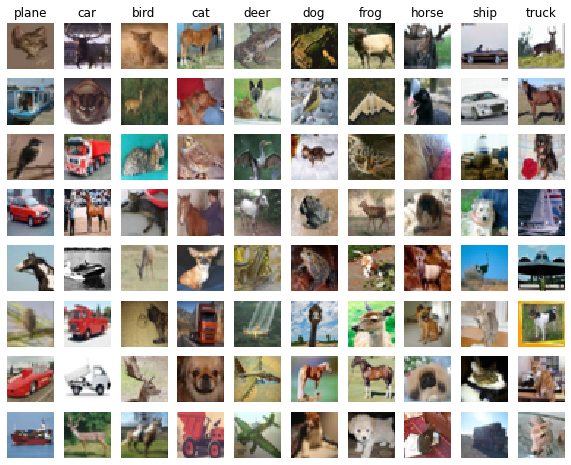

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
# 直观了解算法工作原理的一种重要方法是可视化它所犯的错误。 
# 在此可视化中，我们显示了由于当前系统而被误分类的图像示例。 
# 第一列显示的图像是我们的系统标记为“plane”，但其真实标记不是“plane”。
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$




## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [9]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

results = {}
best_val = -1
best_net = None

learning_rates = [1e-2 ,1e-1, 5e-1, 1, 5]
regularization_strengths = [1e-3, 5e-3, 1e-2, 1e-1, 0.5, 1]

for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=1500, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=False)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc

# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print ('lr %e reg %e val accuracy: %f' % (lr, reg,  val_acc))
    
print( 'best validation accuracy achieved during cross-validation: %f' % best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


E:\MyMasterLife\Pre\CS231n2020\assignment1\assignment1jupy\assignment1\cs231n\classifiers\neural_net.py:141: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(softmax_out[range(N), list(y)]))
E:\MyMasterLife\Pre\CS231n2020\assignment1\assignment1jupy\assignment1\cs231n\classifiers\neural_net.py:138: RuntimeWarning: overflow encountered in subtract
  scores -= np.max(scores, axis=1).reshape(-1, 1)  # 防止数值爆炸 将score中的值平移到最大值为0：
E:\MyMasterLife\Pre\CS231n2020\assignment1\assignment1jupy\assignment1\cs231n\classifiers\neural_net.py:138: RuntimeWarning: invalid value encountered in subtract
  scores -= np.max(scores, axis=1).reshape(-1, 1)  # 防止数值爆炸 将score中的值平移到最大值为0：
E:\MyMasterLife\Pre\CS231n2020\assignment1\assignment1jupy\assignment1\cs231n\classifiers\neural_net.py:142: RuntimeWarning: overflow encountered in double_scalars
  loss = loss / N + reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.

lr 1.000000e-02 reg 1.000000e-03 val accuracy: 0.088000
lr 1.000000e-02 reg 5.000000e-03 val accuracy: 0.128000
lr 1.000000e-02 reg 1.000000e-02 val accuracy: 0.137000
lr 1.000000e-02 reg 1.000000e-01 val accuracy: 0.078000
lr 1.000000e-02 reg 5.000000e-01 val accuracy: 0.105000
lr 1.000000e-02 reg 1.000000e+00 val accuracy: 0.087000
lr 1.000000e-01 reg 1.000000e-03 val accuracy: 0.526000
lr 1.000000e-01 reg 5.000000e-03 val accuracy: 0.516000
lr 1.000000e-01 reg 1.000000e-02 val accuracy: 0.513000
lr 1.000000e-01 reg 1.000000e-01 val accuracy: 0.318000
lr 1.000000e-01 reg 5.000000e-01 val accuracy: 0.079000
lr 1.000000e-01 reg 1.000000e+00 val accuracy: 0.107000
lr 5.000000e-01 reg 1.000000e-03 val accuracy: 0.570000
lr 5.000000e-01 reg 5.000000e-03 val accuracy: 0.564000
lr 5.000000e-01 reg 1.000000e-02 val accuracy: 0.495000
lr 5.000000e-01 reg 1.000000e-01 val accuracy: 0.256000
lr 5.000000e-01 reg 5.000000e-01 val accuracy: 0.078000
lr 5.000000e-01 reg 1.000000e+00 val accuracy: 0

In [10]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.565
